# Creating and Training a Neural Network 

Refresher on how to create and train a Neural Network using PyTorch

In [138]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

- Dataset: Class containing the actual data
- DataLoader: Wrapper that unloads batches of data from a dataset

In [65]:
train_dataset = datasets.MNIST(
    root='data',
    download=True,
    train=True,
    transform=ToTensor()
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

validation_dataset = datasets.MNIST(
    root='data',
    download=True,
    train=False,
    transform=ToTensor()
)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)

Definition of a custom Neural Network with 1 Convolution + Pooling Layer, 1 Flatten layer and 2 Dense layers

In [115]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(5,5), padding='same'),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            torch.nn.Flatten(),
            torch.nn.Linear(1960, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, input):
        return self.layers(input)

Creating an instance of the Neural Network class

In [116]:
model = NeuralNetwork()

Defining a training loop

In [117]:
def train(model, train_loader, n_epochs, learning_rate=1e-5):
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    iterations = len(train_loader)
    for epoch_i in range(n_epochs):
        print(f'Running Epoch: [{epoch_i+1}/{n_epochs}]')
        for i, (x,y) in enumerate(train_loader):

            # Forward Pass
            y_pred_prob = model(x)
            
            # Calculate Loss
            loss = loss_fn(y_pred_prob, y)

            # Backpropagate
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if i%300 == 0 and i>1:
                print(f'    - [{i}/{iterations}] | Loss: {loss.item()}')

Training the model for 10 epochs

In [118]:
train(model, train_loader, n_epochs=10)

Running Epoch: [1/10]
    - [300/1875] | Loss: 2.2782182693481445
    - [600/1875] | Loss: 2.1906015872955322
    - [900/1875] | Loss: 2.142874002456665
    - [1200/1875] | Loss: 1.9919164180755615
    - [1500/1875] | Loss: 1.993850827217102
    - [1800/1875] | Loss: 1.7980072498321533
Running Epoch: [2/10]
    - [300/1875] | Loss: 1.831040859222412
    - [600/1875] | Loss: 1.7632853984832764
    - [900/1875] | Loss: 1.8502992391586304
    - [1200/1875] | Loss: 1.6823924779891968
    - [1500/1875] | Loss: 1.7281488180160522
    - [1800/1875] | Loss: 1.6838058233261108
Running Epoch: [3/10]
    - [300/1875] | Loss: 1.6847962141036987
    - [600/1875] | Loss: 1.590571403503418
    - [900/1875] | Loss: 1.6375477313995361
    - [1200/1875] | Loss: 1.6273255348205566
    - [1500/1875] | Loss: 1.6652591228485107
    - [1800/1875] | Loss: 1.585179090499878
Running Epoch: [4/10]
    - [300/1875] | Loss: 1.6140488386154175
    - [600/1875] | Loss: 1.5639899969100952
    - [900/1875] | Loss: 1.6

In [119]:
n_correct = 0
n_total = len(validation_dataset)
for (x,y) in validation_loader:
    with torch.no_grad():
        y_pred_prob = model(x)
        y_pred = y_pred_prob.argmax(1)
        n_correct += (y == y_pred).type(torch.float).sum().item()

print(f'Accuracy on the validation set: {n_correct/n_total}')
    

Accuracy on the validation set: 0.9313


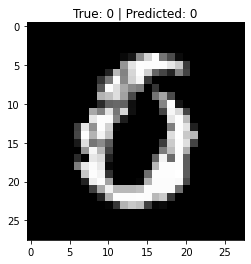

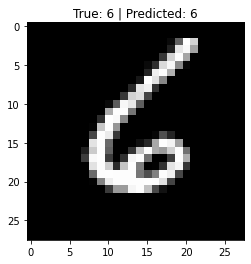

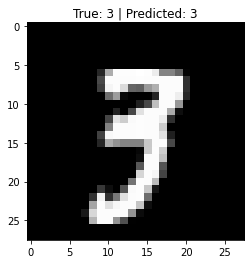

In [121]:
import matplotlib.pyplot as plt

label_mapping = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9"
]

(x,y) = next(iter(validation_loader))

for i in range(3):
    image = x[i].squeeze()
    label = label_mapping[y[i]]
    pred = model(x[i].unsqueeze(1))
    pred_label = label_mapping[pred.argmax(1)]
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {label} | Predicted: {pred_label}')
    plt.show()